### Choice probability - Pie charts vs. Experiential Images ###

Probability 0.125: Probability of choosing an experiential image: 0.9041666666666667
Probability 0.25: Probability of choosing an experiential image: 0.8352272727272727
Probability 0.375: Probability of choosing an experiential image: 0.7598484848484849
Probability 0.5: Probability of choosing an experiential image: 0.5772727272727273
Probability 0.625: Probability of choosing an experiential image: 0.39886363636363636
Probability 0.75: Probability of choosing an experiential image: 0.2761363636363636
Probability 0.875: Probability of choosing an experiential image: 0.1731060606060606


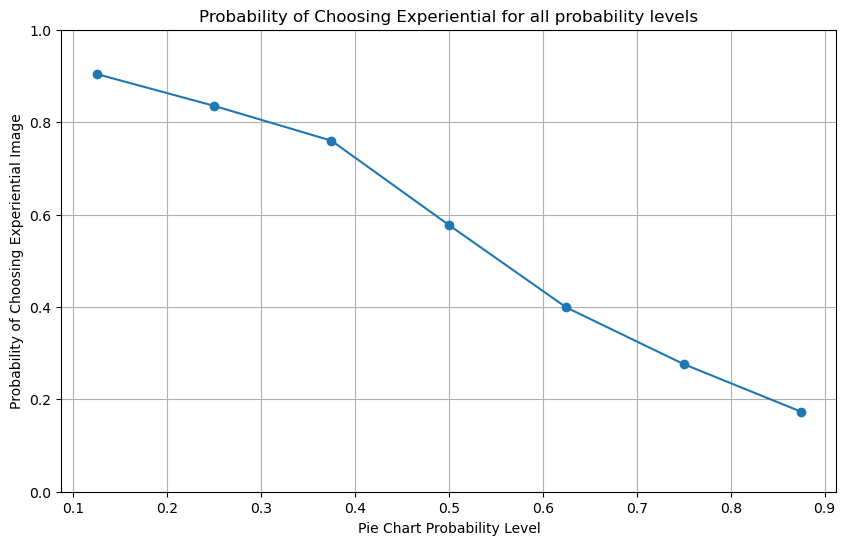

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

# experiential images and pie images 
experiential_image = ["'Cycle'", "'Menu'", "'Intersection'", "'Fire'", "'Mark'", "'Magnet'"]
Pie_image = ["'Pie1'", "'Pie2'", "'Pie3'", "'Pie4'"]
selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]

#dictionary to store results
results = {}
#probabilities = []


for probability in selected_probabilities:
    count_experiential_chosen = 0
    count_total_probability = 0
    
    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in Pie_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1
        elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in Pie_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    if count_total_probability > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_probability
        results[probability] = probability_experiential_chosen
    else:
        results[probability] = 0

for probability, result in results.items():
    print(f"Probability {probability}: Probability of choosing an experiential image: {result}")

x_values = selected_probabilities
y_values = [results[probability] for probability in selected_probabilities]

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('Pie Chart Probability Level')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential for all probability levels')
plt.grid(True)
plt.ylim(0, 1)
plt.show()

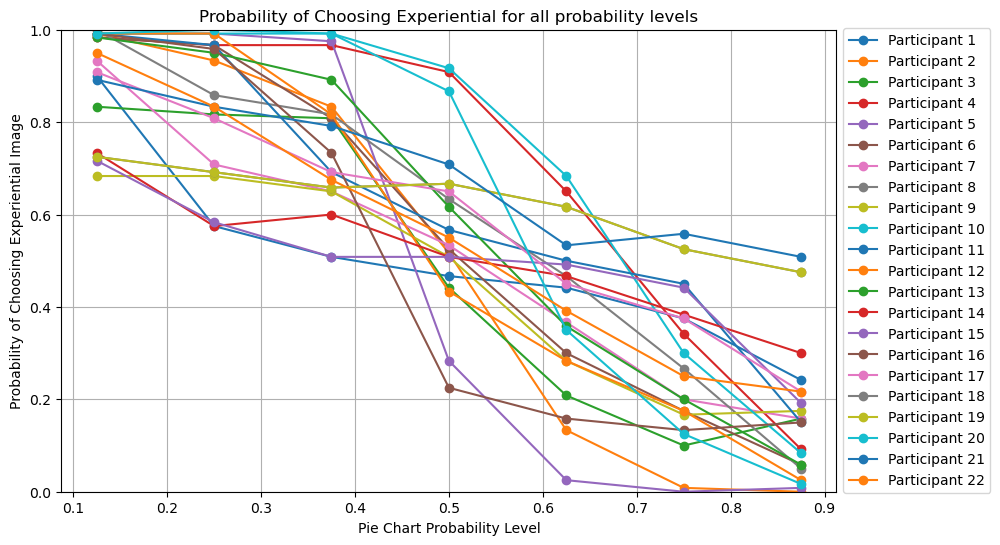

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')
#df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]


selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]
#excluded_participants = [3, 18]
sub_ids = range(1, 23)

#sub_ids = [sub_id for sub_id in sub_ids if sub_id not in excluded_participants]

results = {sub_id: {} for sub_id in sub_ids}

for sub_id in sub_ids:
    for probability in selected_probabilities:
        count_experiential_chosen = 0
        count_total_probability = 0

        for index, row in df.iterrows():
            if row['SubID'] == sub_id:
                if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in Pie_image:
                    count_total_probability += 1
                    if row['selected_imageEXP2'] in experiential_image:
                        count_experiential_chosen += 1
                elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in Pie_image:
                    count_total_probability += 1
                    if row['selected_imageEXP2'] in experiential_image:
                        count_experiential_chosen += 1

        if count_total_probability > 0:
            probability_experiential_chosen = count_experiential_chosen / count_total_probability
            results[sub_id][probability] = probability_experiential_chosen
        else:
            results[sub_id][probability] = 0

plt.figure(figsize=(10, 6))
for sub_id in sub_ids:
    x_values = selected_probabilities
    y_values = [results[sub_id][probability] for probability in selected_probabilities]
    plt.plot(x_values, y_values, marker='o', label=f'Participant {sub_id}')

plt.xlabel('Pie Chart Probability Level')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential for all probability levels')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  
plt.grid(True)
plt.ylim(0, 1)
plt.show()


### To do ###

- good bad participants split - what is the curve of their choice beahviour? 

In [31]:
category1 = ["'Pie1'"]
category2 = ["'Pie2'"]
category3 = ["'Pie3'"]
category4 = ["'Pie4'"]

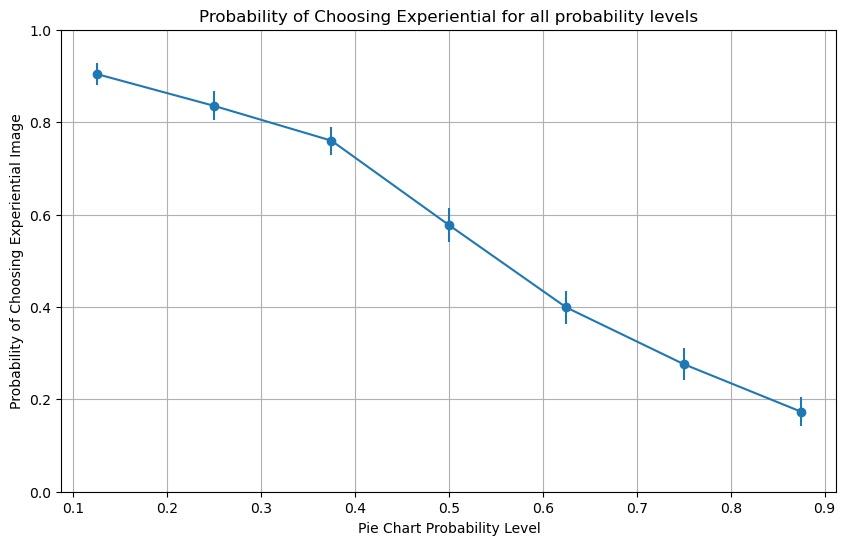

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]
sub_ids = range(1, 23)

results = {probability: [] for probability in selected_probabilities}

for probability in selected_probabilities:
    probability_values = []

    for sub_id in sub_ids:
        count_experiential_chosen = 0
        count_total_probability = 0

        for index, row in df.iterrows():
            if row['SubID'] == sub_id:
                if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in Pie_image:
                    count_total_probability += 1
                    if row['selected_imageEXP2'] in experiential_image:
                        count_experiential_chosen += 1
                elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in Pie_image:
                    count_total_probability += 1
                    if row['selected_imageEXP2'] in experiential_image:
                        count_experiential_chosen += 1

        if count_total_probability > 0:
            probability_experiential_chosen = count_experiential_chosen / count_total_probability
            probability_values.append(probability_experiential_chosen)

    results[probability] = probability_values

# Calculate the mean and standard error for each probability level
mean_values = [np.mean(results[probability]) for probability in selected_probabilities]
std_errors = [np.std(results[probability]) / np.sqrt(len(results[probability])) for probability in selected_probabilities]

plt.figure(figsize=(10, 6))
plt.errorbar(selected_probabilities, mean_values, yerr=std_errors, marker='o', linestyle='-')
plt.xlabel('Pie Chart Probability Level')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential for all probability levels')
plt.grid(True)
plt.ylim(0, 1)
plt.show()


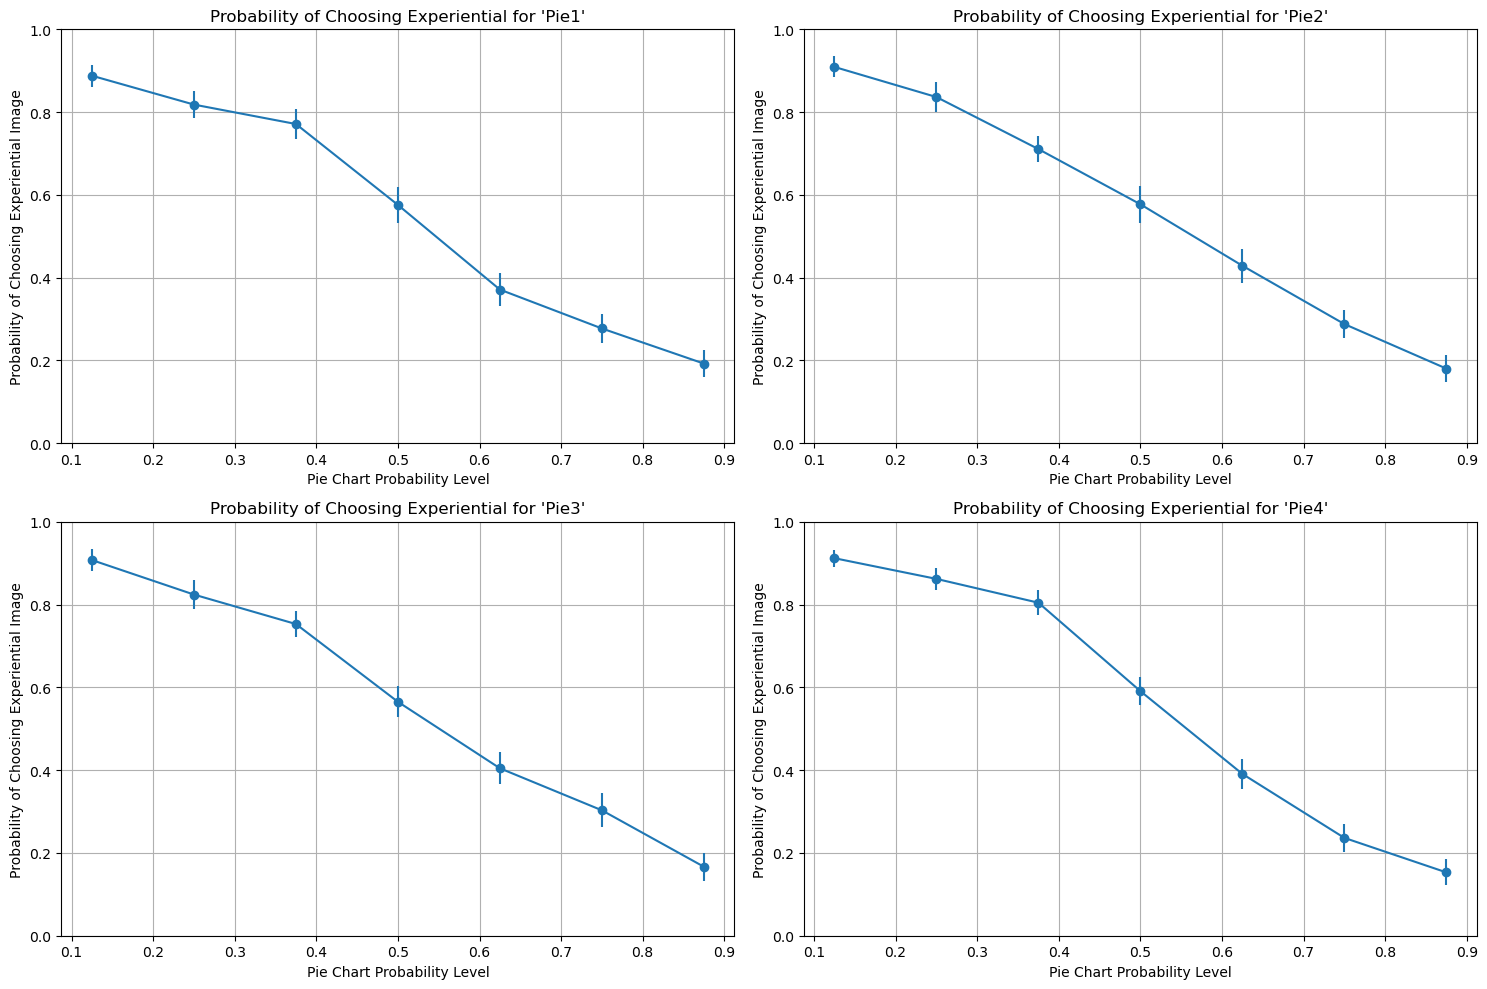

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

categories = ["'Pie1'", "'Pie2'", "'Pie3'", "'Pie4'"]

#df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]
selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]
#excluded_participants = [3, 18]
#sub_ids = [sub_id for sub_id in sub_ids if sub_id not in excluded_participants]

sub_ids = range(1, 23)

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

results = {category: {probability: [] for probability in selected_probabilities} for category in categories}

for idx, category in enumerate(categories):
    for probability in selected_probabilities:
        probability_values = []

        for sub_id in sub_ids:
            count_experiential_chosen = 0
            count_total_probability = 0

            for index, row in df.iterrows():
                if row['SubID'] == sub_id:
                    if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in [category]:
                        count_total_probability += 1
                        if row['selected_imageEXP2'] in experiential_image:
                            count_experiential_chosen += 1
                    elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in [category]:
                        count_total_probability += 1
                        if row['selected_imageEXP2'] in experiential_image:
                            count_experiential_chosen += 1

            if count_total_probability > 0:
                probability_experiential_chosen = count_experiential_chosen / count_total_probability
                probability_values.append(probability_experiential_chosen)

        results[category][probability] = probability_values

    mean_values = [np.mean(results[category][probability]) for probability in selected_probabilities]
    std_errors = [np.std(results[category][probability]) / np.sqrt(len(results[category][probability])) for probability in selected_probabilities]
    axs[idx].errorbar(selected_probabilities, mean_values, yerr=std_errors, marker='o', linestyle='-')
    axs[idx].set_xlabel('Pie Chart Probability Level')
    axs[idx].set_ylabel('Probability of Choosing Experiential Image')
    axs[idx].set_title(f'Probability of Choosing Experiential for {category}')
    axs[idx].grid(True)
    axs[idx].set_ylim(0, 1)

plt.tight_layout()
plt.show()


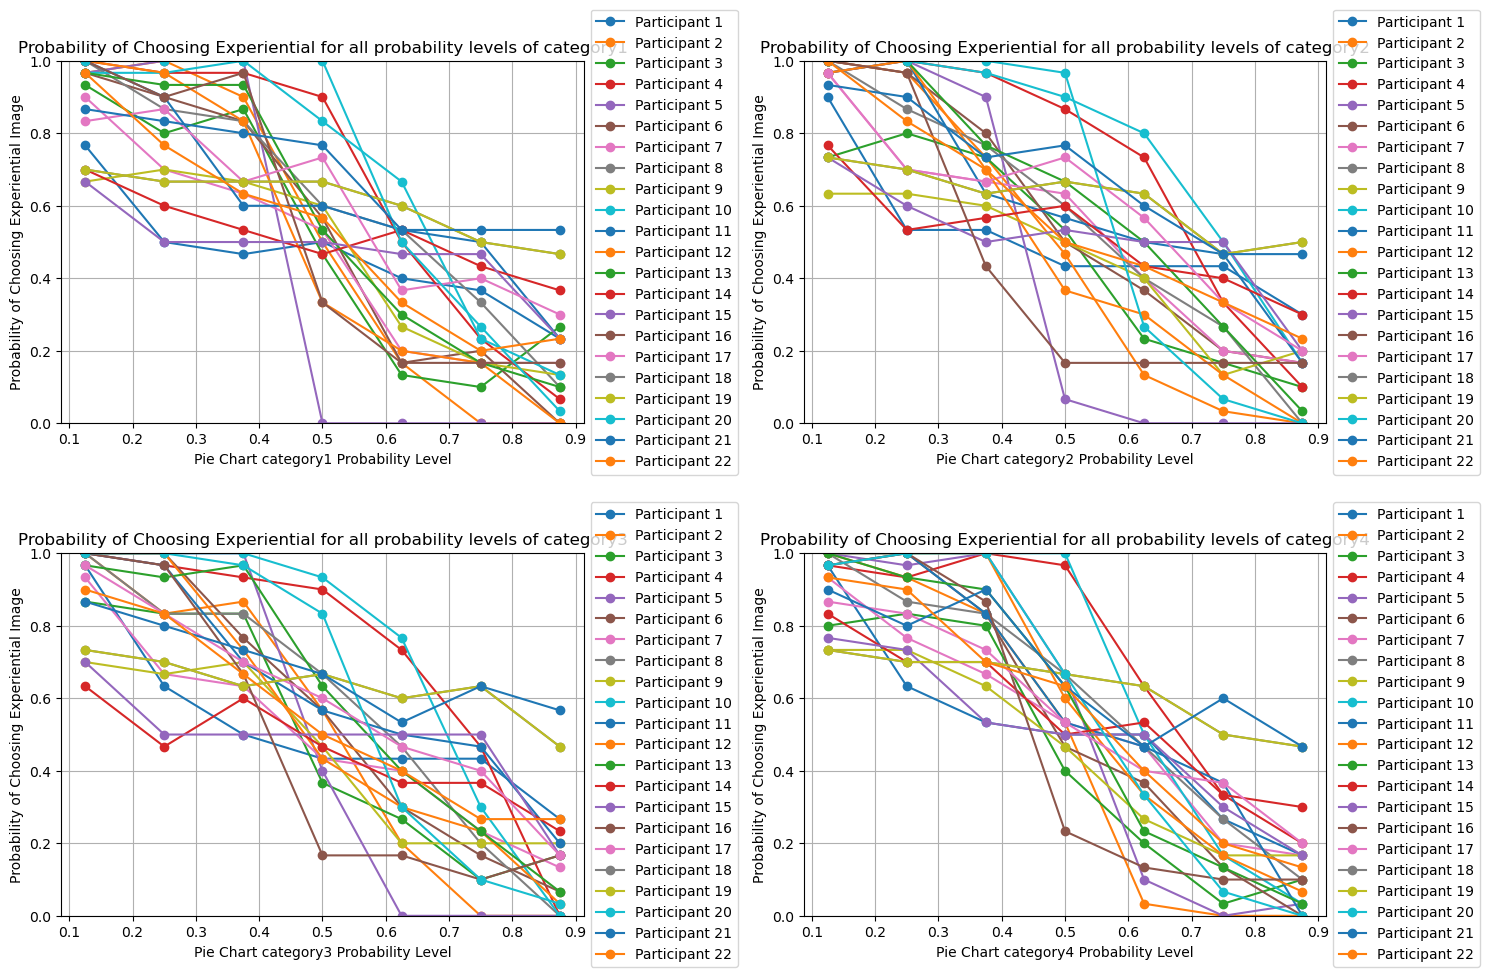

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')
categories = [["'Pie1'"], ["'Pie2'"], ["'Pie3'"], ["'Pie4'"]]

#df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]

selected_probabilities = [0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875]
#excluded_participants = [3, 18]
sub_ids = range(1, 23)

#sub_ids = [sub_id for sub_id in sub_ids if sub_id not in excluded_participants]

results = {sub_id: {} for sub_id in sub_ids}

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, category in enumerate(categories, 1):
    for sub_id in sub_ids:
        for probability in selected_probabilities:
            count_experiential_chosen = 0
            count_total_probability = 0

            for index, row in df.iterrows():
                if row['SubID'] == sub_id:
                    if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in category:
                        count_total_probability += 1
                        if row['selected_imageEXP2'] in experiential_image:  
                            count_experiential_chosen += 1
                    elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in category:
                        count_total_probability += 1
                        if row['selected_imageEXP2'] in experiential_image:
                            count_experiential_chosen += 1

            if count_total_probability > 0:
                probability_experiential_chosen = count_experiential_chosen / count_total_probability
                results[sub_id][probability] = probability_experiential_chosen
            else:
                results[sub_id][probability] = 0

        x_values = selected_probabilities
        y_values = [results[sub_id][probability] for probability in selected_probabilities]
        axs[idx - 1].plot(x_values, y_values, marker='o', label=f'Participant {sub_id}')

    axs[idx - 1].set_xlabel(f'Pie Chart category{idx} Probability Level')
    axs[idx - 1].set_ylabel('Probability of Choosing Experiential Image')
    axs[idx - 1].set_title(f'Probability of Choosing Experiential for all probability levels of category{idx}')
    axs[idx - 1].legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
    axs[idx - 1].grid(True)
    axs[idx - 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


Probability 0.125: Probability of choosing a pie image: 0.6962406015037594
Probability 0.25: Probability of choosing a pie image: 0.6236842105263158
Probability 0.375: Probability of choosing a pie image: 0.5620300751879699
Probability 0.625: Probability of choosing a pie image: 0.3424812030075188
Probability 0.75: Probability of choosing a pie image: 0.30413533834586465
Probability 0.875: Probability of choosing a pie image: 0.16466165413533834


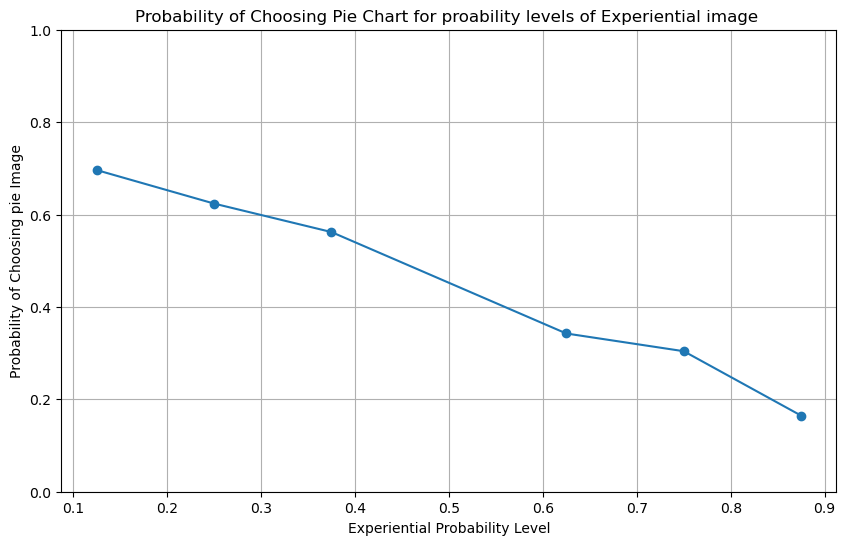

In [4]:
# Excluding p===0.5 as this doesn't exist for experiential images
selected_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

results = {}

for probability in selected_probabilities:
    count_pie_chosen = 0
    count_total_probability = 0
    
    for index, row in df.iterrows():
        # does left or right side have an exp.icon with the current prob. level???
        if row['left_probabilityEXP2'] == probability and row['left_imagesEXP2'] in experiential_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1
        elif row['right_probabilityEXP2'] == probability and row['right_imagesEXP2'] in experiential_image:
            count_total_probability += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1

    # probability of choosing an pie image for this probability level
    if count_total_probability > 0:
        probability_pie_chosen = count_pie_chosen / count_total_probability
        results[probability] = probability_pie_chosen
    else:
        results[probability] = 0

for probability, result in results.items():
    print(f"Probability {probability}: Probability of choosing a pie image: {result}")

# lists for x and y values for the plot
x_values = selected_probabilities
y_values = [results[probability] for probability in selected_probabilities]
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o')
plt.xlabel('Experiential Probability Level')
plt.ylabel('Probability of Choosing pie Image')
plt.title('Probability of Choosing Pie Chart for proability levels of Experiential image ')
plt.grid(True)
plt.ylim(0, 1)

plt.show()

In [46]:
import pandas as pd

pie_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

for pie_prob in pie_probabilities:
    count_experiential_chosen = 0

    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the experiential_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    if count_total_matched > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_matched
        print(f"Probability of choosing an experiential image when both pie probability and experiential image probability are {pie_prob}: {probability_experiential_chosen}")
    


Probability of choosing an experiential image when both pie probability and experiential image probability are 0.125: 0.740909090909091
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.25: 0.6954545454545454
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.375: 0.6818181818181818
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.625: 0.5340909090909091
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.75: 0.41363636363636364
Probability of choosing an experiential image when both pie probability and experiential image probability are 0.875: 0.49318181818181817


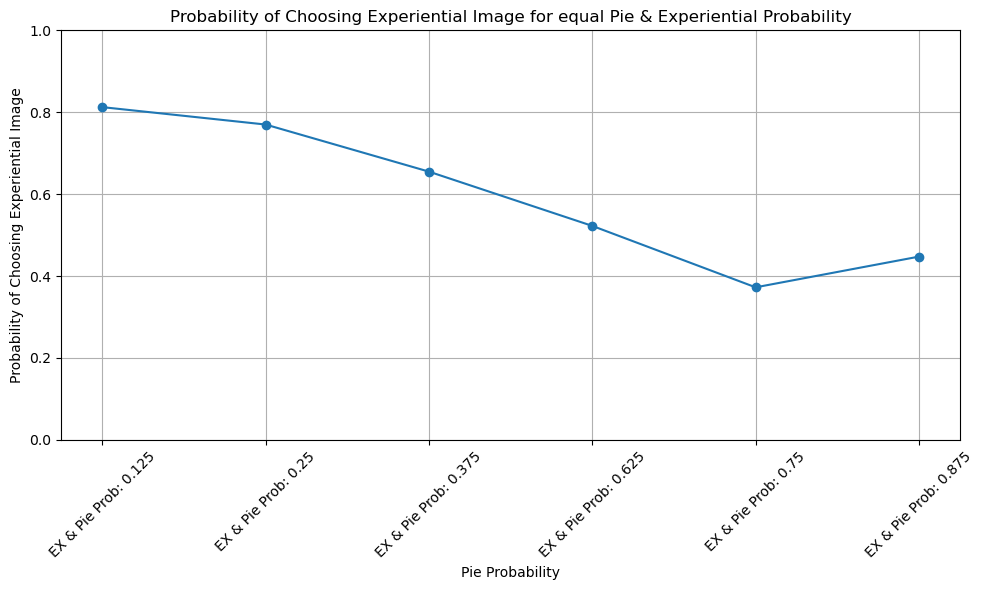

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

pie_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

sub_ids = range(1, 23)

probabilities = []
labels = []

for pie_prob in pie_probabilities:
    count_experiential_chosen = 0

    # count for the total number of rows where both pie prob. and experiential image prob. match the current level
    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the experiential_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in experiential_image:
                count_experiential_chosen += 1

    if count_total_matched > 0:
        probability_experiential_chosen = count_experiential_chosen / count_total_matched
        probabilities.append(probability_experiential_chosen)
        labels.append(f"EX & Pie Prob: {pie_prob}")
# line plot   
plt.figure(figsize=(10, 6))
plt.plot(labels, probabilities, marker='o', linestyle='-')
plt.xlabel('Pie Probability')
plt.ylabel('Probability of Choosing Experiential Image')
plt.title('Probability of Choosing Experiential Image for equal Pie & Experiential Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()


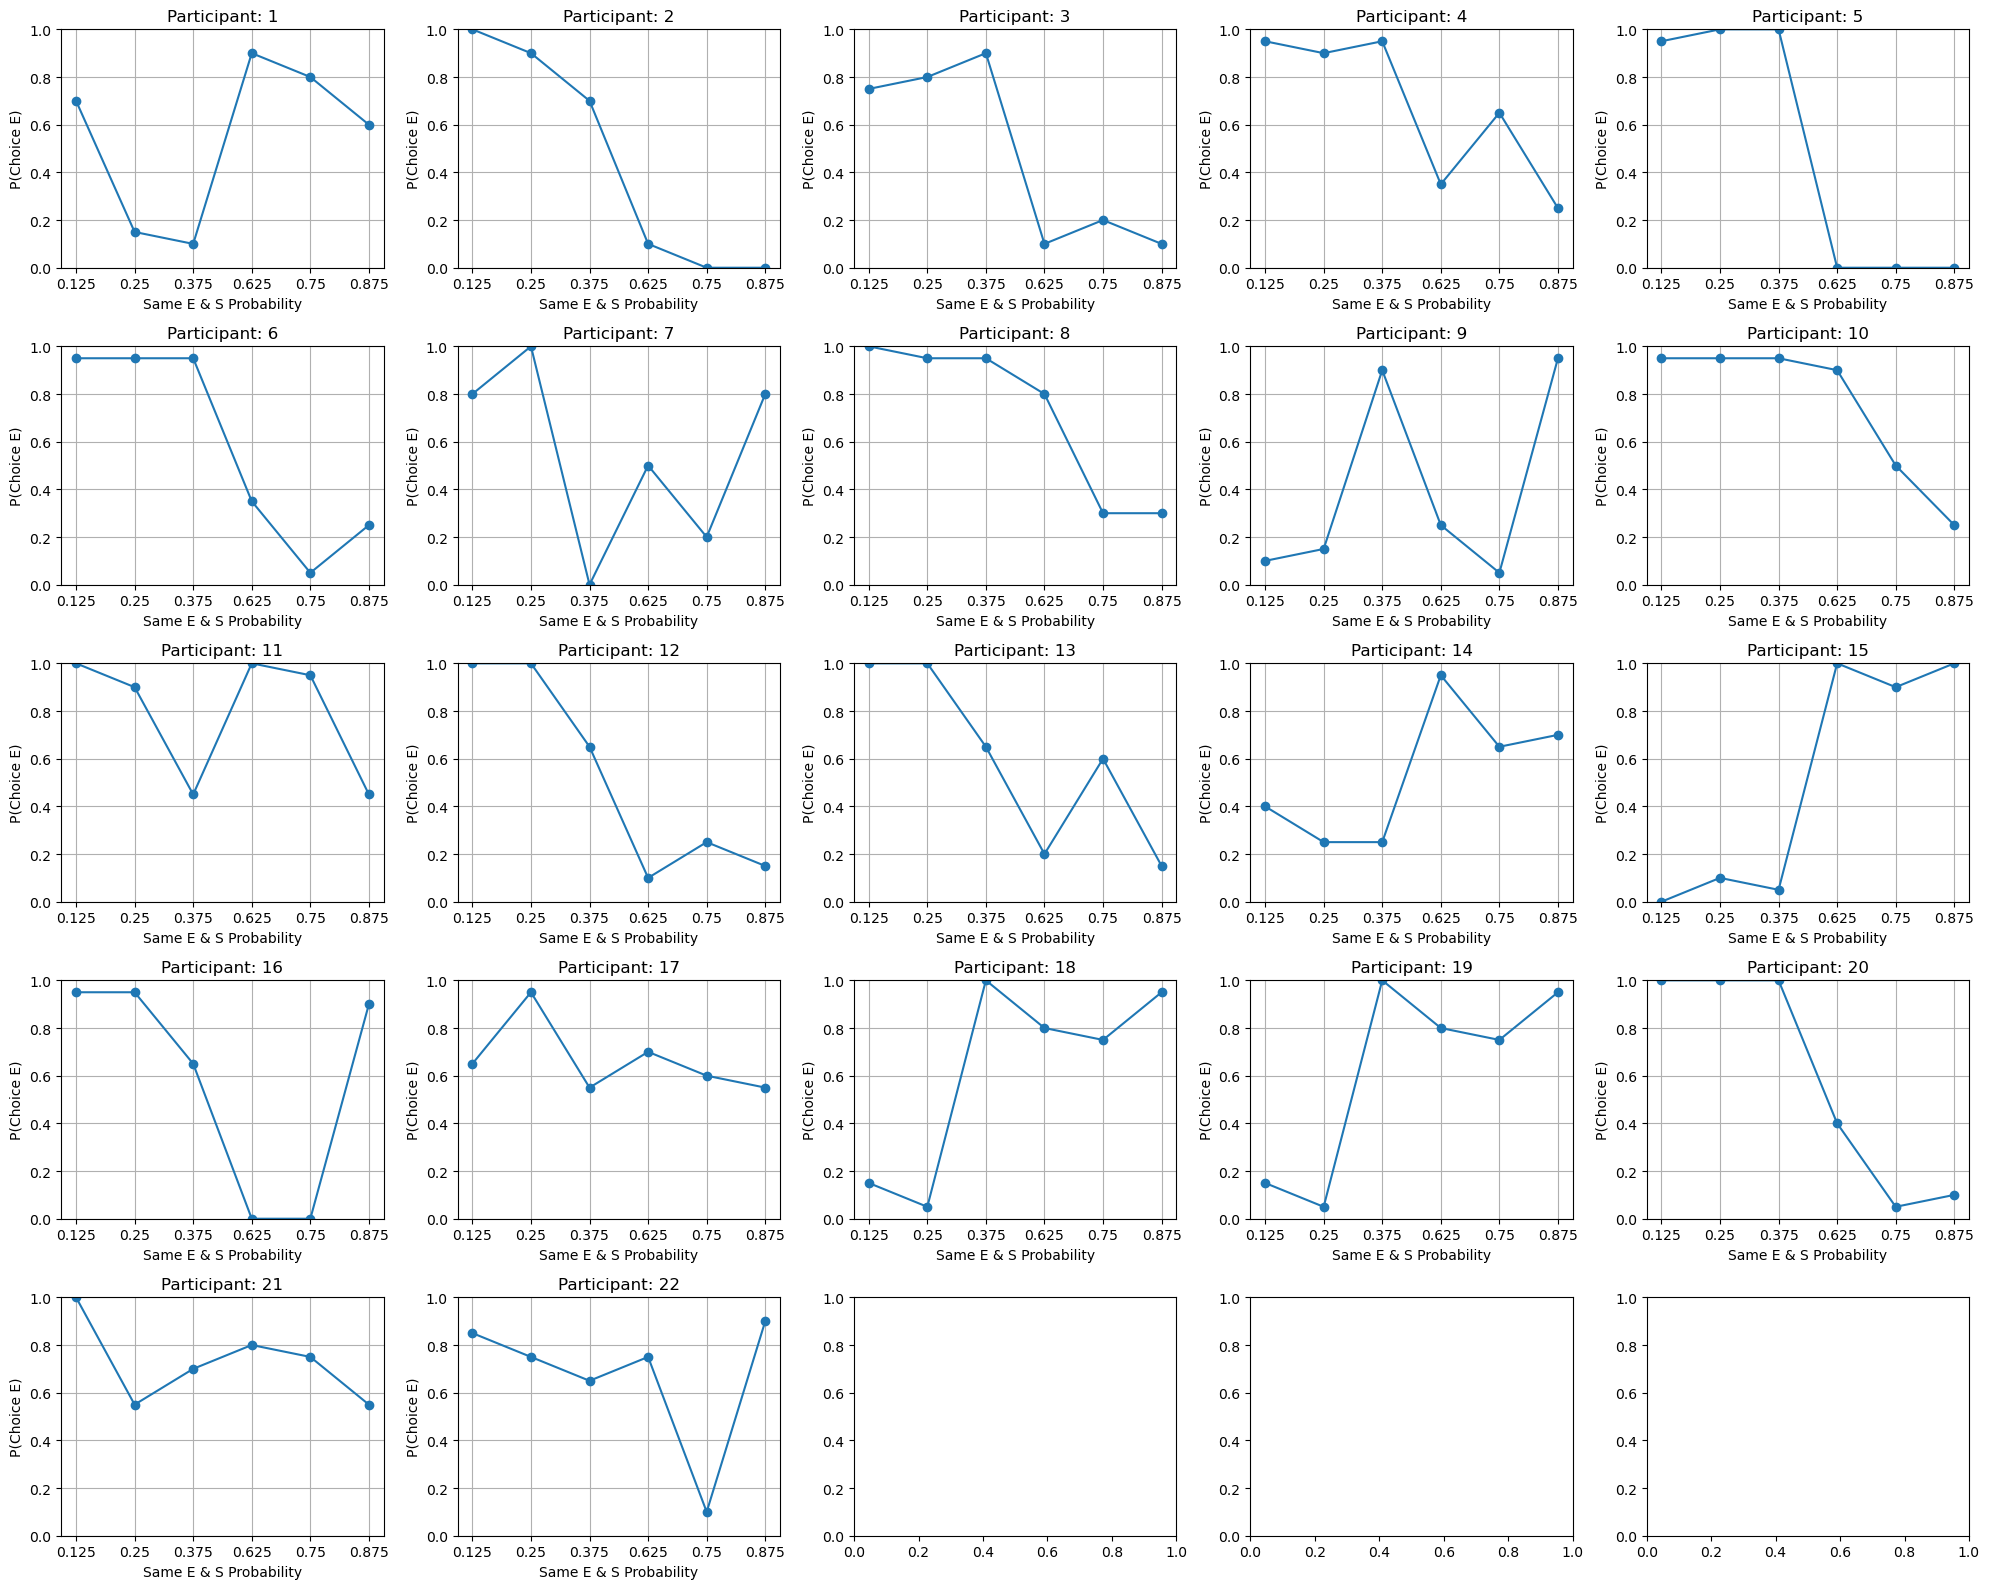

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('VD_Participant_1_22_Data.csv', sep=';')

pie_probabilities = [0.125, 0.250, 0.375, 0.625, 0.750, 0.875]

#df = df[(df['SubID'] != 3) & (df['SubID'] != 18)]

#excluded_participants = [3, 18]
sub_ids = range(1, 23)
#sub_ids = [sub_id for sub_id in sub_ids if sub_id not in excluded_participants]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 16))

for i, sub_id in enumerate(sub_ids):
    row = i // 5
    col = i % 5

    ax = axes[row, col]

    participant_df = df[df['SubID'] == sub_id]

    probabilities = []
    labels = []

    for pie_prob in pie_probabilities:
        count_experiential_chosen = 0
        count_total_matched = 0

        for index, row in participant_df.iterrows():
            if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
                count_total_matched += 1
                if row['selected_imageEXP2'] in experiential_image:
                    count_experiential_chosen += 1

        if count_total_matched > 0:
            probability_experiential_chosen = count_experiential_chosen / count_total_matched
            probabilities.append(probability_experiential_chosen)
            labels.append(f"{pie_prob}")

    ax.plot(labels, probabilities, marker='o', linestyle='-')
    ax.set_xlabel('Same E & S Probability')
    ax.set_ylabel('P(Choice E)')
    ax.set_title(f'Participant: {sub_id}')
    ax.tick_params(axis='x', rotation= 0)
    ax.grid(True)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


Probability of choosing pie chart when both pie probability and experiential image probability are 0.125: 0.2590909090909091
Probability of choosing pie chart when both pie probability and experiential image probability are 0.25: 0.30454545454545456
Probability of choosing pie chart when both pie probability and experiential image probability are 0.375: 0.3181818181818182
Probability of choosing pie chart when both pie probability and experiential image probability are 0.625: 0.4659090909090909
Probability of choosing pie chart when both pie probability and experiential image probability are 0.75: 0.5863636363636363
Probability of choosing pie chart when both pie probability and experiential image probability are 0.875: 0.5068181818181818


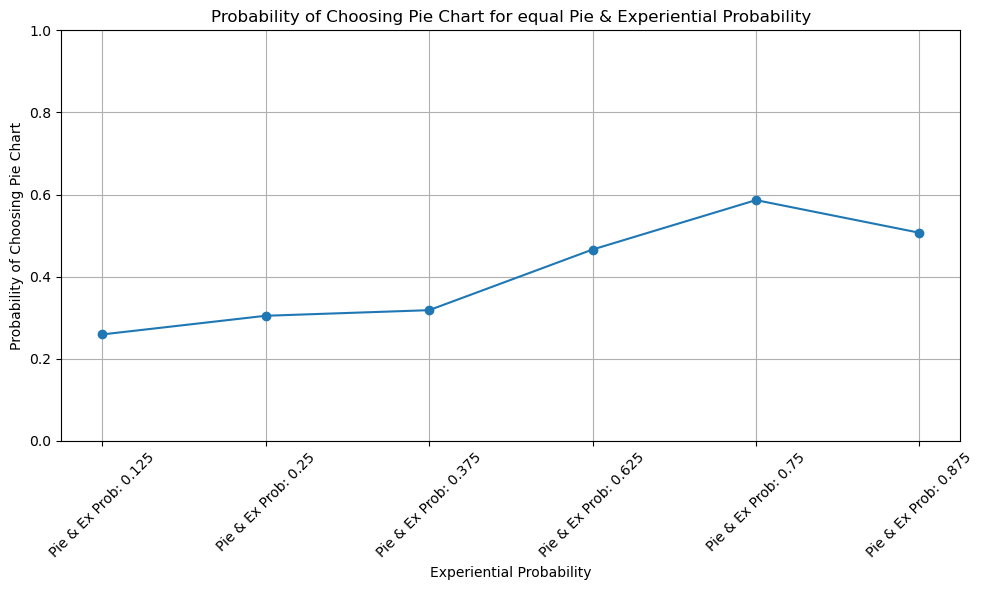

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# prob. for choosing pie chart when    pie.prob. = exp.prob
probabilities = []
labels = []

for pie_prob in pie_probabilities:
    count_pie_chosen = 0
    count_total_matched = 0

    # 1. do left and right sides have pie charts with the current pie probability
    # 2. is the selected image in the Pie_image list

    for index, row in df.iterrows():
        if row['left_probabilityEXP2'] == pie_prob and row['right_probabilityEXP2'] == pie_prob:
            count_total_matched += 1
            if row['selected_imageEXP2'] in Pie_image:
                count_pie_chosen += 1

    if count_total_matched > 0:
        probability_pie_chosen = count_pie_chosen / count_total_matched
        print(f"Probability of choosing pie chart when both pie probability and experiential image probability are {pie_prob}: {probability_pie_chosen}")

        probabilities.append(probability_pie_chosen)
        labels.append(f"Pie & Ex Prob: {pie_prob}")
    
plt.figure(figsize=(10, 6))
plt.plot(labels, probabilities, marker='o', linestyle='-')
plt.xlabel('Experiential Probability')
plt.ylabel('Probability of Choosing Pie Chart')
plt.title('Probability of Choosing Pie Chart for equal Pie & Experiential Probability')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
